## First

- Copy `NEAR_regex.py` into the same folder as this file. [It's here](https://ledatascifi.github.io/ledatascifi-2023/content/04/02d_RegexApplication.html#demo) (click the "+") or in the community codebook. You should name the file `NEAR_regex.py` and not `NEAR_regex.ipynb`.
- Make a `.gitignore` file in this folder with  `**10k_files/*` in it.
- Copy [this file](https://github.com/donbowen/Class-Notes-1045/raw/main/Midterm%20sandbox/10k_files.zip) into the `10k_files/` folder here.
- Copy the things in the assignment's input folder in to the inputs folder here.
- Optional: You can install `tqdm` (If you don't, then remove it from the code below.)


In [58]:
!git clone https://github.com/donbowen/Class-Notes-1045
!mv /content/Class-Notes-1045/'Midterm sandbox'/* .
!rm -rf /content/Class-Notes-1045

Cloning into 'Class-Notes-1045'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (105/105), done.
remote: Total 144 (delta 70), reused 97 (delta 30), pack-reused 0
Receiving objects: 100% (144/144), 9.36 MiB | 13.11 MiB/s, done.
Resolving deltas: 100% (70/70), done.
mv: cannot move '/content/Class-Notes-1045/Midterm sandbox/inputs' to './inputs': Directory not empty


In [59]:
import os
if not os.path.exists('/content/10k_files'):
    os.mkdir('/content/10k_files')
!mv /content/10k_files.zip /content/10k_files

In [60]:
import fnmatch
import glob
import os
import re
from time import sleep
from zipfile import ZipFile

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from near_regex import NEAR_regex  # copy this file into the asgn folder
from tqdm import tqdm  # progress bar on loops

# if you have tqdm issues, run this in terminal or with ! trick
# jupyter nbextension enable --py widgetsnbextension
# jupyter labextension install @jupyter-widgets/jupyterlab-manager
#
# if that fails, you can disable it

os.makedirs("output", exist_ok=True)

## Load sentiment dictionaries

In [61]:
# Q1 - load the ML negative words into a list called BHR_negative
# BHR is the author names on that paper
# "ML" might be a better name, but having "LM" and "ML" in bound
# to cause transcription errors

BHR_negative = pd.read_csv('inputs/ML_negative_unigram.txt',
            names=['word'])['word'].to_list()   

In [62]:
# Q2 - load the ML positive words into a list called BHR_positive

# "r" means we are opening the file in "read" mode ... "w"rite mode means you'll write the file 
with open('inputs/ML_positive_unigram.txt', 'r') as file:
    BHR_positive = [line.strip() for line in file]


In [63]:
# Q3 - load the LM negative words into a list called LM_positive

LM = pd.read_csv('inputs/LM_MasterDictionary_1993-2021.csv')
LM_negative = LM.query('Negative > 0')['Word'].to_list()

# ABCD > look at the data... what is going on with the values?
# LM.describe() > there are negative numbers? and 2009-2014?
# look for documentation! readme in the inputs folder points to the docs and explains the numbers


Look at the resulting lists... not identical structure...

In [64]:
BHR_positive[:20]
LM_negative[:20]

['ABANDON',
 'ABANDONED',
 'ABANDONING',
 'ABANDONMENT',
 'ABANDONMENTS',
 'ABANDONS',
 'ABDICATED',
 'ABDICATES',
 'ABDICATING',
 'ABDICATION',
 'ABDICATIONS',
 'ABERRANT',
 'ABERRATION',
 'ABERRATIONAL',
 'ABERRATIONS',
 'ABETTING',
 'ABNORMAL',
 'ABNORMALITIES',
 'ABNORMALITY',
 'ABNORMALLY']

In [65]:
# Q4 - load the LM positive words into a list called LM_positive
LM_positive = LM.query('Positive > 0')['Word'].to_list()
LM_positive[:20]

['ABLE',
 'ABUNDANCE',
 'ABUNDANT',
 'ACCLAIMED',
 'ACCOMPLISH',
 'ACCOMPLISHED',
 'ACCOMPLISHES',
 'ACCOMPLISHING',
 'ACCOMPLISHMENT',
 'ACCOMPLISHMENTS',
 'ACHIEVE',
 'ACHIEVED',
 'ACHIEVEMENT',
 'ACHIEVEMENTS',
 'ACHIEVES',
 'ACHIEVING',
 'ADEQUATELY',
 'ADVANCEMENT',
 'ADVANCEMENTS',
 'ADVANCES']

## Looping over a dataframe and adding a variable

In [66]:
import random

# step 1 will load some database and prep it for the loopy parts
# here, we will just use a toy dataset

toy_database = pd.DataFrame({"Security":['3M','TLSA','APPL'],
             "URL":['blahblah.com','wikisomething.com','wiki.com']})

toy_database

for index, row in toy_database.iterrows():
    print(f"Index: {index}, URL: {row['URL']}")
    #row can be used like row['var_name']
    
    sentiment_positive= random.randint(0,10)
    toy_database.loc[index, 'Sentiment'] = sentiment_positive 

toy_database

Index: 0, URL: blahblah.com
Index: 1, URL: wikisomething.com
Index: 2, URL: wiki.com


,Security,URL,Sentiment
0,3M,blahblah.com,6.0
1,TLSA,wikisomething.com,5.0
2,APPL,wiki.com,6.0


## Measure sentiment

What fraction of the words in this "document" (sentence) are "happy" words?

Answer: 2/13. Let's replicate that with code. 

First, count the length of the document.

Then, count how many times each word is in the document.

In [67]:
happy_sentiment = ['happy','smile','hopeful']

sentence = 'I am happy that you are here. I am all smiles. So hopeful!'

# q0 count the number of "words" (the doc length)

len(sentence.split())
# len(re.findall(' ',sentence))+1 # works only if every word in doc is separated by exactly 1 space

13

What we did:
```python 
# just type the words
len(re.findall('happy',sentence)) # works but
len(re.findall('smile',sentence)) # fails

# look for words between word boundaries (\b)
# r before string is important!
len(re.findall(r'\bhappy\b',sentence)) # works
len(re.findall(r'\bsmile\b',sentence)) # works too
```


In [68]:
# q1 count how many times "happy" is used in the doc
# hint: https://ledatascifi.github.io/ledatascifi-2023/content/04/02b_regex.html

len(re.findall(r'\bhappy\b',sentence))

# r means "raw" string -- a backslash is a backslash, not the start of some special character

1

In [69]:
# q2 count how many times "smile" is used in the doc

# fails! smile is not a word in the doc!
len(re.findall(r'smile',sentence))
len(re.findall(r'\b(smile)\b',sentence))



0

In [70]:
# q3 count how many times "smile" or "happy" is used in the doc
# hint: similar to q2 answer... 
# the answer is somewhere this page: https://regexone.com/

# () makes for groups of matching possibilities
# | means "or"
len(re.findall(r'\b(happy|smile)\b',sentence))


1

In [71]:
# q4 - prof demo - count how many time all the words are in the doc
# 4.4.4 has examples + output
# docstring: https://github.com/LeDataSciFi/ledatascifi-2023/blob/main/community_codebook/near_regex.py
# solve 

len(re.findall(r'\b(happy|smile|hopeful)\b',sentence))
 

2

That worked. Let's try to do the same using NEAR_regex.

- look at docstring `help(NEAR_regex)` and 4.4.4 to learn about function

In [72]:
# look for topic1 near topic2 
# topic is a list of words, (word1|word2)a
happy_sentiment_stringlist = ['(happy|smile|hopeful)']  # this is a list!!!!!
NEAR_regex(happy_sentiment_stringlist)

'(?:\\b(happy|smile|hopeful)\\b)'

Warning!

Check that the length of the "stuff" you give NEAR_regex <= 4. 

Updated version of function in codebook has a check at the top to prevent disaster.


In [73]:
len(re.findall(NEAR_regex(happy_sentiment_stringlist)
    ,sentence))

# partial = true finds smiles
# partal = false makes sense with well defined and large lists 
# max_words... how many is "right" 
# max_words = 5 ... means the words must be separated by at most 5, but the "window" around the anchor is 10 words

2

In [74]:
# q5 - using py's string functions, convert
# happy_sentiment into the format NEAR_regex() wants 
# hint: 4.4.1

happy_sentiment # take happy_sentiment, output this: '(happy|smile|hopeful)'
happy_for_regex =      ['('+'|'.join(happy_sentiment)+')']     


In [75]:
# q6 - calculate the doc's happy_sentiment score

(
len(re.findall(NEAR_regex(happy_for_regex),sentence)) 
/
len(sentence.split())
)


0.15384615384615385

Now, you know how to 
1. Load the sentiment dictionaries
1. Convert each to a form for NEAR_regex
1. Use each regex to count hits in a doc
1. Measure each sentiment

## Opening a 10-K file

I'm giving everyone this code because dealing with Zips is a headache the first 15 times you do it.
- Open the zip before the loop and get a list of all files already in it
- With that zip open, do your loopy stuff inside it

You'll update this loop with things we've learned already. Put the lego pieces together. 

In [76]:
# open the zip file (do this before the for loop
# so you only open it one time... faster)
with ZipFile('10k_files/10k_files.zip','r') as zipfolder:
    
    # before the loop, get list of files in zipped folder
    file_list = zipfolder.namelist()
        
    # replace this with how you'd loop over the dataframe
    for firm in ["ALLE"]: #,"MMM","TSLA"]:
        
        # get a list of possible files for this firm
        firm_folder    = "sec-edgar-filings/" + firm + '/10-K/*/*.html'
        possible_files = fnmatch.filter(file_list, firm_folder) 
        if len(possible_files) == 0: 
            continue
            
        fpath = possible_files[0] # the first match is the path to the file

        # open the file (this is a little different!)
        with zipfolder.open(fpath) as report_file:
            html = report_file.read().decode(encoding="utf-8")

## Cleaning the html

Print out `html`... 

In [77]:
html[:500]

'<?xml version="1.0" ?><!--XBRL Document Created with Wdesk from Workiva--><!--Copyright 2022 Workiva--><!--r:55fcaf7e-a32c-46db-9214-d3455640547a,g:8d4d7be5-91d0-4fc9-ad03-d6b94bcac834,d:42dbe9d853384615ac6fc384cf0f23cd--><html xml:lang="en-US" xmlns="http://www.w3.org/1999/xhtml" xmlns:alle="http://www.allegion.com/20211231" xmlns:country="http://xbrl.sec.gov/country/2021" xmlns:dei="http://xbrl.sec.gov/dei/2021q4" xmlns:iso4217="http://www.xbrl.org/2003/iso4217" xmlns:ix="http://www.xbrl.org/2'

Regex won't work on this as is! We need to remove all the html tags, drop the hidden data, and then, with the remaining text, clean it up using the "Good ideas" in 4.4 and 4.4.4 of the book. However, we have to slightly adjust the code. 

1. Use BeautifulSoup() with the `lxml-xml` parser. Call the output `soup`. Don't use `get_text` yet. 
1. Delete the hidden XBRL 

    ```python
    for div in soup.find_all("div", {'style':'display:none'}): 
        div.decompose()
    ```
    
1. Continue on (get the text from the soup, and continue from there...)
1. Check: My cleaned string says "allegion" in positions 396-404

In [78]:
# work here

soup = BeautifulSoup(html,features='lxml-xml')

for div in soup.find_all("div", {'style':'display:none'}): 
    div.decompose()
    
lower = soup.get_text().lower()    
no_punc = re.sub(r'\W',' ',lower)    
cleaned = re.sub(r'\s+',' ',no_punc)   

## Get 10-K dates

We need to know when the 10-K is released to see the stock returns around it.

I'm going to give you most of this code. How I figured it out:
- I know we have the CIK and accession number
- Looked for EDGAR urls that have CIK + accession number, and then list filing date on the page
- https://www.sec.gov/Archives/edgar/data/1122304/0001193125-15-118890-index.html
- `requests_html` ([my listed suggestion here](https://ledatascifi.github.io/ledatascifi-2023/content/04/01_Intro_to_scraping.html#my-suggestion)) is the `requests` module for getting data from the web PLUS the ability to grab parts of the html
    
Exercise:
- I used code straight off the [documentation's home page](https://requests.readthedocs.io/projects/requests-html/en/latest/), adapted slightly. Look for examples that _find_ parts of the html.
- You'll need to figure out the "CSS Selector"
    - right click on the filing date on the webpage, click inspect
    - in the area that popped up, right click on html code containing that date and copy the CSS selector


In [79]:
!pip install requests_html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
# before the loop, set up a browser session

from requests_html import HTMLSession
session = HTMLSession()

# inside your loop, get the cik and accession number for the filing

cik = 1122304
accession_number = '0001193125-15-118890'

# *one* way to get the filing date... 

url = f'https://www.sec.gov/Archives/edgar/data/{cik}/{accession_number}-index.html'
print(url) # check it out...
r = session.get(url)

https://www.sec.gov/Archives/edgar/data/1122304/0001193125-15-118890-index.html


In [86]:
# EXERCISE: get the filing date out of this "r" object (one line of code will do)
r.html.find('div.formGrouping:nth-child(1) > div:nth-child(2)',first=True).text

# more readable, easier to understand, but... need to know a lil
soup = BeautifulSoup(r.text, 'html.parser')
soup.find('div',text='Filing Date').find_next_sibling('div').text.strip()


<ipython-input-86-27234113d416>:6: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  soup.find('div',text='Filing Date').find_next_sibling('div').text.strip()


'2015-04-03'

To use this in your actual midterm, save the  accession_number to your database while doing the main for loop to parse the text.

Then, after that, I wrote a second for loop that loops over the rows, and uses the code above to grab the date. I added some error checking (What if we don't have an accession number for that firm, what if the url is wrong, or the server denies you, or the line of code with filing_date fails?)

## Get returns around the 10-K dates

[Returns for 2022 are here.](https://github.com/LeDataSciFi/data/blob/main/Stock%20Returns%20(CRSP))

Before you try to use that, here are toy datasets of returns and filing dates that mimic the structure of the data you'll actually have. 

In [82]:
data = {
    'ticker': ['JJSF']*20 + ['TSLA']*20,
    'date': ['2021-12-01', '2021-12-02', '2021-12-03', '2021-12-06', '2021-12-07', '2021-12-08', '2021-12-09', '2021-12-10', '2021-12-13', '2021-12-14', '2021-12-15', '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28', '2021-12-29'] + ['2022-12-02', '2022-12-05', '2022-12-06', '2022-12-07', '2022-12-08', '2022-12-09', '2022-12-12', '2022-12-13', '2022-12-14', '2022-12-15', '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28', '2022-12-29', '2022-12-30'],
    'ret': [-0.011276, 0.030954, 0.000287, 0.014362, 0.012459, 0.017200, -0.010173, 0.011875, 0.012559, 0.002508, 0.022852, 0.012360, 0.017387, -0.008957, 0.016840, -0.000256, -0.002558, 0.009041, -0.002097, 0.010189] + [0.000822, -0.063687, -0.014415, -0.032143, -0.003447, 0.032345, -0.062720, -0.040937, -0.025784, 0.005548, -0.047187, -0.002396, -0.080536, -0.001669, -0.088828, -0.017551, -0.114089, 0.033089, 0.080827, 0.011164]
}

crsp = pd.DataFrame(data)
crsp['date'] = pd.to_datetime(crsp['date'])

fake_filings = pd.DataFrame({'ticker':['JJSF','TSLA'],
                             'filing_date':['2021-12-03','2022-12-13']})

In [83]:
crsp

,ticker,date,ret
0,JJSF,2021-12-01,-0.011276
1,JJSF,2021-12-02,0.030954
2,JJSF,2021-12-03,0.000287
3,JJSF,2021-12-06,0.014362
4,JJSF,2021-12-07,0.012459
5,JJSF,2021-12-08,0.017200
6,JJSF,2021-12-09,-0.010173
7,JJSF,2021-12-10,0.011875
8,JJSF,2021-12-13,0.012559
9,JJSF,2021-12-14,0.002508


In [84]:
# try here...

# pseudocode first! imagine the structure of the dataset you want and work backwards, you'll struggle otherwise!

# this really is a paper and pencil problem
fake_filings

,ticker,filing_date
0,JJSF,2021-12-03
1,TSLA,2022-12-13


## Merge it all together

The readme shows what the output dataset should look like, roughly. The midterm directions elaborate (10 sentiment variables, 2 return measures). 

Here is the outline of the code for completing the task:

Load the necessary libraries and dependencies.

Load the required input files: LM_MasterDictionary_1993-2021.csv, ML_negative_unigram.txt, ML_positive_unigram.txt, and sp500_2022.csv.

Load the sample firms dataset saved inside the input/ folder.

Define a function to clean the text of the 10-Ks.

Define a function to calculate the sentiment scores of the 10-Ks using the LM and ML dictionaries.

Loop over each firm in the sample dataset and perform the following tasks:
a. Load the corresponding 10-K.
b. Clean the text of the 10-K.
c. Calculate the sentiment scores using the LM and ML dictionaries.
d. Calculate the total length of the document and the number of unique words (bonus).
e. Calculate the two return measurements and save those to the correct row and column in the dataframe.

Save the output dataframe to the output/ folder.

Create the necessary visualizations and tables for the report using the output dataframe.

#### 2 versions of a “buy and hold” around the 10-K date (“date t”)

In [91]:
%cd /content

/content


In [92]:
!git clone https://github.com/LeDataSciFi/data
!mv /content/data/'Stock Returns (CRSP)'/crsp_2022_only.zip /content

Cloning into 'data'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 98 (delta 32), reused 53 (delta 13), pack-reused 0
Unpacking objects: 100% (98/98), 66.08 MiB | 10.38 MiB/s, done.


In [ ]:
!unzip /content/crsp_2022_only.zip

In [99]:
df = pd.read_stata('crsp_2022_only.dta')

In [103]:
df.head(30)

,ticker,date,ret
0,JJSF,2021-12-01,-0.011276
1,JJSF,2021-12-02,0.030954
2,JJSF,2021-12-03,0.000287
3,JJSF,2021-12-06,0.014362
4,JJSF,2021-12-07,0.012459
5,JJSF,2021-12-08,0.017200
6,JJSF,2021-12-09,-0.010173
7,JJSF,2021-12-10,0.011875
8,JJSF,2021-12-13,0.012559
9,JJSF,2021-12-14,0.002508


In [104]:
df.describe()

,ret
count,2.588861e+06
mean,8.057433e-05
std,1.429420e+00
min,-9.996924e-01
25%,-1.298071e-02
50%,-1.003011e-04
75%,1.067999e-02
max,2.299000e+03


In [107]:
import pandas as pd

# # Load the dataset
# df = pd.read_stata('crsp_2022_only.dta')

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

# Define function to compute buy and hold return for a given time span
def compute_bh_return(df, start_date, end_date):
    # Filter rows for the given time span
    mask = (df['date'] >= start_date) & (df['date'] <= end_date)
    df_span = df.loc[mask]

    # Compute buy and hold return for each ticker
    bh_returns = []
    for ticker in df_span['ticker'].unique():
        ticker_df = df_span[df_span['ticker'] == ticker]
        bh_return = (1 + ticker_df['ret']).prod() - 1
        bh_returns.append({'ticker': ticker, 'bh_return': bh_return})

    # Convert results to a DataFrame
    bh_returns_df = pd.DataFrame(bh_returns)

    return bh_returns_df

# Compute buy and hold return for version 1
start_date_v1 = pd.to_datetime('2022-02-28', format='%Y-%m-%d')
end_date_v1 = pd.to_datetime('2022-03-02', format='%Y-%m-%d')
bh_returns_v1 = compute_bh_return(df, start_date_v1, end_date_v1)

# Compute buy and hold return for version 2
start_date_v2 = pd.to_datetime('2022-03-03', format='%Y-%m-%d')
end_date_v2 = pd.to_datetime('2022-03-14', format='%Y-%m-%d')
bh_returns_v2 = compute_bh_return(df, start_date_v2, end_date_v2)

# Print results
print('Version 1:')
print(bh_returns_v1)
print('Version 2:')
print(bh_returns_v2)


Version 1:
     ticker  bh_return
0      JJSF  -0.001585
1       ELA   0.014563
2      PLXS   0.002574
3      RMCF  -0.012376
4      HNGR   0.026403
...     ...        ...
9427    VPG  -0.054079
9428     FN  -0.007418
9429   CBOE   0.010218
9430   SANW   0.022422
9431   TSLA   0.086458

[9432 rows x 2 columns]
Version 2:
     ticker  bh_return
0      JJSF  -0.052619
1       ELA   0.043062
2      PLXS  -0.008191
3      RMCF  -0.081454
4      HNGR   0.031618
...     ...        ...
9449    VPG   0.057502
9450     FN  -0.039462
9451   CBOE  -0.041470
9452   SANW  -0.043860
9453   TSLA  -0.129016

[9454 rows x 2 columns]


In [121]:
bh_returns_v1

,ticker,bh_return
0,JJSF,-0.001585
1,ELA,0.014563
2,PLXS,0.002574
3,RMCF,-0.012376
4,HNGR,0.026403
...,...,...
9427,VPG,-0.054079
9428,FN,-0.007418
9429,CBOE,0.010218
9430,SANW,0.022422


In [122]:
bh_returns_v2

,ticker,bh_return
0,JJSF,-0.052619
1,ELA,0.043062
2,PLXS,-0.008191
3,RMCF,-0.081454
4,HNGR,0.031618
...,...,...
9449,VPG,0.057502
9450,FN,-0.039462
9451,CBOE,-0.041470
9452,SANW,-0.043860


#### 10 sentiment variables

In [130]:
# -*- coding: utf-8 -*-
import fnmatch
import glob
import os
import re
from time import sleep
from zipfile import ZipFile

import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
from near_regex import NEAR_regex
from tqdm import tqdm
from requests_html import HTMLSession

os.makedirs("output", exist_ok=True)

# Load sentiment dictionaries
BHR_negative = pd.read_csv('inputs/ML_negative_unigram.txt', names=['word'])['word'].to_list()
with open('inputs/ML_positive_unigram.txt', 'r') as file:
    BHR_positive = [line.strip() for line in file]

LM = pd.read_csv('inputs/LM_MasterDictionary_1993-2021.csv')
LM_negative = LM.query('Negative > 0')['Word'].to_list()
LM_positive = LM.query('Positive > 0')['Word'].to_list()

# Define the topics
positive_topics = ['climate', 'sustainability', 'diversity']
negative_topics = ['litigation', 'fraud', 'bankruptcy']

# Loop over the sample firms
with ZipFile('10k_files/10k_files.zip', 'r') as zipfolder:
    file_list = zipfolder.namelist()
    for firm in os.listdir('/content/sec-edgar-filings'):
        print(f'Processing {firm}')
        
        firm_folder = f"sec-edgar-filings/{firm}/10-K/*/*.html"
        possible_files = fnmatch.filter(file_list, firm_folder)
        if len(possible_files) == 0:
            continue
            
        fpath = possible_files[0]
        with zipfolder.open(fpath) as report_file:
            html = report_file.read().decode(encoding="utf-8")
        
        # Clean the html
        soup = BeautifulSoup(html, features='lxml-xml')
        for div in soup.find_all("div", {'style': 'display:none'}):
            div.decompose()
        lower = soup.get_text().lower()
        no_punc = re.sub(r'\W', ' ', lower)
        cleaned = re.sub(r'\s+', ' ', no_punc)
        
        # Get the release date of the 10-K
        cik = fpath.split('/')[2]
        accession_number = fpath.split('/')[3].split('-')[0]
        url = f"https://www.sec.gov/Archives/edgar/data/{cik}/{accession_number}-index.htm"
        try:
            session = HTMLSession()
            r = session.get(url)
            r.html.render()
            filing_date = r.html.find('#formDiv > div:nth-child(2) > div:nth-child(1) > span:nth-child(2)', first=True).text
        except:
            filing_date = None
        
        # Measure sentiment
        num_words = len(cleaned.split())
        num_unique_words = len(set(cleaned.split()))
        results = {'LM Positive': 0, 'LM Negative': 0, 'ML Positive': 0, 'ML Negative': 0}
        
        for word in cleaned.split():
            if word in LM_positive:
                results['LM Positive'] += 1
            elif word in LM_negative:
                results['LM Negative'] += 1
            elif word in BHR_positive:
                results['ML Positive'] += 1
            elif word in BHR_negative:
                results['ML Negative'] += 1
        
        for topic in positive_topics:
            topic_score = len(re.findall(NEAR_regex([topic]), cleaned)) / num_words
            results[f'NEAR {topic}'] = topic_score
            results['ticker'] = firm
        for topic in negative_topics:
            topic_score = len(re.findall(NEAR_regex([topic]), cleaned)) / num_words
            results[f'NEAR {topic}'] = topic_score
            results['ticker'] = firm
    
        # Save results to a csv
        output_file = f"output/{firm}_10k_sentiment.csv"
        results['Filing Date'] = filing_date
        results['Number of Words'] = num_words
        results['Number of Unique Words'] = num_unique_words
        pd.DataFrame(results, index=[0]).to_csv(output_file, index=False)
    

Processing ALLE
Processing ARE
Processing ADBE
Processing AFL
Processing A
Processing MMM
Processing ALK
Processing AKAM
Processing AAP
Processing ATVI
Processing analysis_sample.csv
Processing ADP
Processing ACN
Processing ABT
Processing ALGN
Processing ALB
Processing ABBV
Processing ADM
Processing APD
Processing AES
Processing AOS


In [131]:
# Combine results into a single CSV file
csv_files = glob.glob('output/*_10k_sentiment.csv')
dfs = []
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)
combined_df = pd.concat(dfs, axis=0, ignore_index=True)


In [132]:
combined_df.head()

,LM Positive,LM Negative,ML Positive,ML Negative,NEAR climate,ticker,NEAR sustainability,NEAR diversity,NEAR litigation,NEAR fraud,NEAR bankruptcy,Filing Date,Number of Words,Number of Unique Words
0,0,0,1530,1398,0.000107,ADBE,0.000018,0.000196,0.000391,0.000089,0.00000,NaN,56245,5484
1,0,0,1532,1622,0.000072,AKAM,0.000000,0.000090,0.000324,0.000054,0.00000,NaN,55603,5154
2,0,0,1124,1270,0.000019,ABT,0.000019,0.000115,0.000442,0.000077,0.00000,NaN,52061,5045
3,0,0,1887,2052,0.000109,APD,0.000249,0.000062,0.000218,0.000062,0.00000,NaN,64212,5255
4,0,0,1528,1859,0.000089,ATVI,0.000015,0.000149,0.000238,0.000045,0.00003,NaN,67164,5193


In [139]:
combined_df.columns

Index(['LM Positive', 'LM Negative', 'ML Positive', 'ML Negative',
       'NEAR climate', 'ticker', 'NEAR sustainability', 'NEAR diversity',
       'NEAR litigation', 'NEAR fraud', 'NEAR bankruptcy', 'Filing Date',
       'Number of Words', 'Number of Unique Words'],
      dtype='object')

In [133]:
combined_df.to_csv('analysis_sample.csv', index=False)
combined_df.to_csv('/content/output/analysis_sample.csv', index=False)

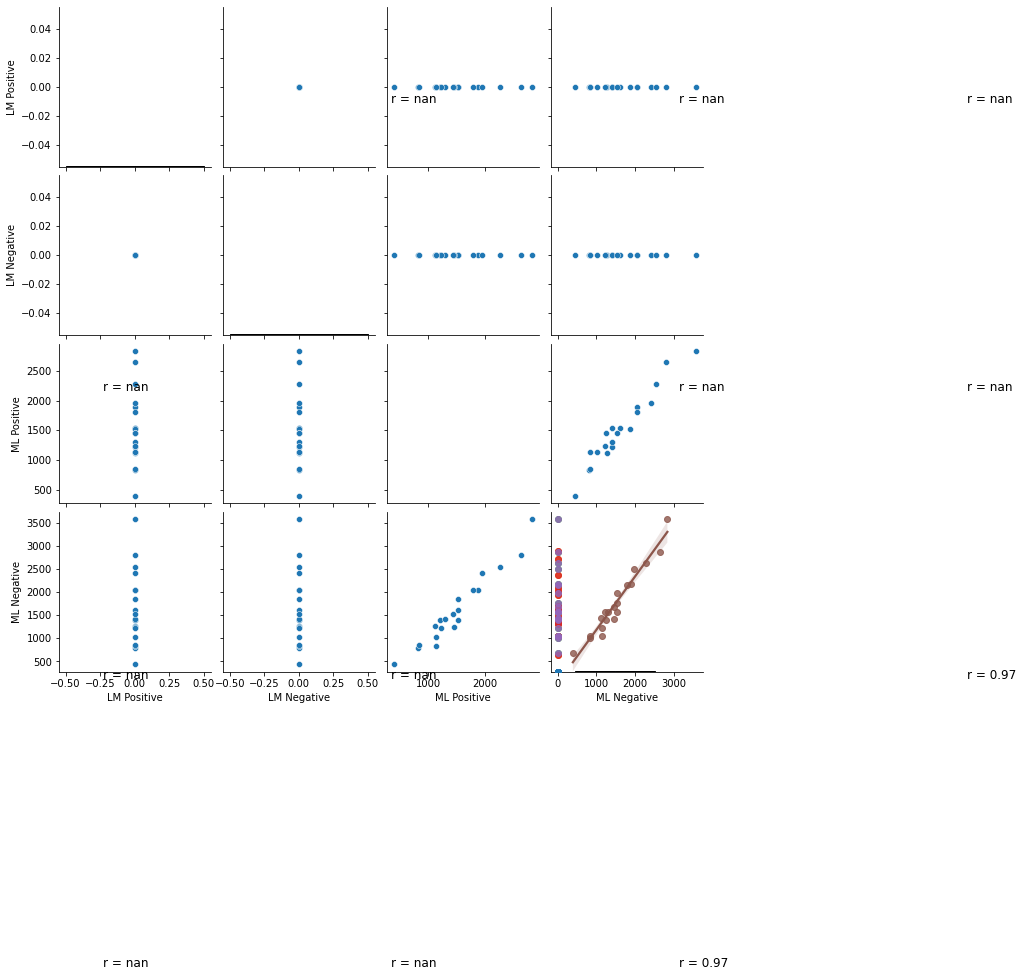

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load sentiment data
sentiment_data = pd.read_csv('output/analysis_sample.csv')

# Create scatterplot matrix
sns.pairplot(sentiment_data, vars=['LM Positive', 'LM Negative', 'ML Positive', 'ML Negative'])

# Add correlation coefficients to scatterplot
corrs = sentiment_data[['LM Positive', 'LM Negative', 'ML Positive', 'ML Negative']].corr()
corrs = corrs.round(2)
for i in range(len(corrs)):
    for j in range(len(corrs)):
        if i != j:
            x = 0.15 + i*0.4
            y = 0.85 - j*0.4
            text = f"r = {corrs.iloc[i, j]}"
            plt.text(x, y, text, fontsize=12, transform=plt.gcf().transFigure)
            
# Add regression lines to scatterplot
sns.regplot(x='LM Positive', y='LM Negative', data=sentiment_data)
sns.regplot(x='LM Positive', y='ML Positive', data=sentiment_data)
sns.regplot(x='LM Positive', y='ML Negative', data=sentiment_data)
sns.regplot(x='LM Negative', y='ML Positive', data=sentiment_data)
sns.regplot(x='LM Negative', y='ML Negative', data=sentiment_data)
sns.regplot(x='ML Positive', y='ML Negative', data=sentiment_data)

# Show the plot
plt.show()
